In [21]:
!pip install -U langchain-community ir_datasets faiss-cpu

In [2]:
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 65.6 MB/s eta 0:00:00:00:010:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 66.5 MB/s eta 0:00:00:00:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
!pip install "rerankers[all]" cohere

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 37.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.3/195.3 MB 8.3 MB/s eta 0:00:000:00:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.7/137.7 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 66.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 86.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 10.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [4]:
!python --version

Python 3.10.12


In [5]:
!pip install "rerankers[flashrank]" llm-rankers

  Preparing metadata (setup.py) ... done
  Created wheel for llm-rankers: filename=llm_rankers-0.0.2-py3-none-any.whl size=24868 sha256=e444447ad170f3e5f1c5999986642d23e0cece7467b58d84e8d281fc95bca285
  Stored in directory: /root/.cache/pip/wheels/f8/36/4c/e55c3c058134289b00b69c204afc36864d86f1a7b9b9099cc4
Successfully built llm-rankers


In [6]:
!pip install deep_translator ranx huggingface_hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 61.1 MB/s eta 0:00:00:00:01


In [23]:
from sentence_transformers import SentenceTransformer
from langchain.vectorstores import FAISS
import faiss
import torch
from langchain.text_splitter import CharacterTextSplitter
import spacy
import pandas as pd
import numpy as np
import concurrent.futures
import pickle
from transformers import pipeline
from scipy.stats import skew
from langchain_text_splitters import TokenTextSplitter
from rerankers import Reranker
from deep_translator import GoogleTranslator
from collections import defaultdict
from ranx import Qrels, Run, evaluate
from transformers import logging
from huggingface_hub import login
from kaggle_secrets import UserSecretsClient


user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("HF_TOKEN")
cohere_api_key = user_secrets.get_secret("COHERE_TRIAL_API_KEY")
login(secret_value_0)

logging.set_verbosity_error()

pd.set_option('display.max_colwidth', 100)
nlp = spacy.load("es_core_news_sm")
nlp = spacy.load("en_core_web_sm")
if torch.cuda.is_available():
    print(torch.cuda.get_device_name(torch.cuda.current_device()))

Tesla T4


In [8]:
model = SentenceTransformer("nomic-ai/nomic-embed-text-v2-moe", trust_remote_code=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/554 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/8.41k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.48k [00:00<?, ?B/s]

configuration_hf_nomic_bert.py:   0%|          | 0.00/1.96k [00:00<?, ?B/s]

modeling_hf_nomic_bert.py:   0%|          | 0.00/103k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.90G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

In [9]:
import ir_datasets
dataset = ir_datasets.load("codec/history")

In [4]:
needed_docs_ids = set()
for qrel in dataset.qrels_iter():
    needed_docs_ids.add(qrel.doc_id)
len(needed_docs_ids)

1884

In [5]:
history_docs = []
for doc in dataset.docs_iter():
    if doc.doc_id in needed_docs_ids:
        history_docs.append(doc)
len(history_docs)

1884

In [ ]:
with open("translated-docs-codec-history.pkl", "wb") as f:
    pickle.dump(history_docs, f)

In [6]:
with open("docs-codec-history.pkl", "rb") as f:
    history_docs = pickle.load(f)

#### Traduccion

In [10]:
class TranslatedCodecDoc:
    def __init__(self, doc, translated_text: str) -> None:
        self.doc_id = doc.doc_id
        self.text = translated_text
        self.title = doc.title
        self.count = doc.count
        self.index = doc.index
        self.url = doc.url

    @classmethod
    def from_codec_doc(cls, doc, text_translated: str) -> "TranslatedCodecDoc":
        return cls(doc, text_translated)

In [ ]:
from deep_translator import GoogleTranslator
translator = GoogleTranslator(source='en', target='es')

In [18]:
d1 = history_docs[0]
nt = translator.translate(d1.text)
tcd = TranslatedCodecDoc.from_codec_doc(d1, nt)

In [ ]:
translated_history_docs: list[TranslatedCodecDoc] = []
for i, doc in enumerate(history_docs):
    try:
        doc_spacy = nlp(doc.text)
        new_text = ""
        current_sentences = ""
        for sent in doc_spacy.sents:
            if len(current_sentences) + len(sent.text) > 4500:
                translated_sentences = translator.translate(current_sentences)
                current_sentences = sent.text + " "
                new_text += translated_sentences + " "
            else:
                current_sentences += sent.text + " "

        translated_sentences = translator.translate(current_sentences)
        new_text += translated_sentences + " "
        current_sentences = ""

        translated_history_docs.append(TranslatedCodecDoc.from_codec_doc(doc, new_text))
        print(f"{i+1}/{len(history_docs)}: {doc.doc_id} translated")
    except Exception as e:
        print(f"Error translating doc-{i}/{doc.doc_id}: {e}")

In [11]:
class CodecHistoryStore:
    def __init__(self, docs: list[TranslatedCodecDoc]) -> None:
        self.docs = docs
        self.chunks = []
        self.chunks_ids = []
        self.embeddings = None

        self.__create_chunks()

    def __create_chunks(self):
        text_splitter = TokenTextSplitter(chunk_size=512, chunk_overlap=50)
        for i, doc in enumerate(self.docs):
            new_chunks = text_splitter.split_text(doc.text)
            self.chunks.extend(new_chunks)
            self.chunks_ids.extend([i] * len(new_chunks))
    
    def doc_from_chunk_id(self, chunk_id: int) -> TranslatedCodecDoc:
        return self.docs[self.chunks_ids[chunk_id]]

    def chunk_from_id(self, chunk_id: int) -> str:
        return self.chunks[chunk_id]

    def generate_embeddings(self):
        model = SentenceTransformer("nomic-ai/nomic-embed-text-v2-moe", trust_remote_code=True)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model = model.to(device)

        self.embeddings = model.encode(self.chunks, convert_to_tensor=True, prompt_name="passage")

In [12]:
# store = CodecHistoryStore(history_docs)
# len(store.chunks), len(store.chunks_ids)

with open("/kaggle/input/store-codec-history-translated/store-with-embeddings-translated-docs-codec-history.pkl", "rb") as f:
    store = pickle.load(f)
store.embeddings.shape

torch.Size([12707, 768])

In [13]:
embeddings_np = store.embeddings.cpu().numpy()
dimension = embeddings_np.shape[1]
index = faiss.IndexFlatL2(dimension)
index.add(embeddings_np)

In [14]:
faiss.write_index(index, "faiss-index-translated-docs-codec-history.bin")

In [14]:
import os
import torch
from transformers import pipeline
from huggingface_hub import InferenceClient

local_pipe = None

def __init_pipe():
    global local_pipe
    if local_pipe is None:
        model_id = "meta-llama/Llama-3.2-1B-Instruct"
        local_pipe = pipeline(
            "text-generation",
            model=model_id,
            torch_dtype=torch.bfloat16,
            device_map="auto",
        )


def __rewrite_local(q: str, messages: str) -> str:
    __init_pipe()
    global local_pipe

    outputs = local_pipe(
        messages,
        max_new_tokens=256,
    )

    return outputs[0]["generated_text"][-1]["content"]

def rewrite(q: str, use_local_model: bool = False) -> str:
    messages = [
        {
            "role": "system",
            "content": "Eres un experto en historia latinoamericana. Tu tarea es tomar consultas relacionadas con la historia de América Latina y reformularlas para hacerlas más precisas, claras y detalladas. Deberías asegurarte de que la nueva consulta sea más específica, completa y comprensible. Responde solo con la consulta reformulada, sin agregar respuestas completas ni contenido adicional. No uses listas, títulos ni formato Markdown.",
        },
        {"role": "user", "content": q},
    ]
    return __rewrite_local(q, messages)


### Cargar qrels
Como en el dataset hay etiquetas de relevancia del 0 al 3, las que son mayores o iguales a 1 son marcadas como relevantes.

In [15]:
qrels = Qrels.from_ir_datasets("codec/history")
qrels_dict: dict = qrels.to_dict()

for key in qrels_dict.keys():
    for doc_id in qrels_dict[key]:
        if qrels_dict[key][doc_id] > 0:
            qrels_dict[key][doc_id] = 1

qrels = Qrels.from_dict(qrels_dict)
len(qrels)

[INFO] [starting] https://raw.githubusercontent.com/grill-lab/CODEC/main/topics/topics.json
[INFO] [finished] https://raw.githubusercontent.com/grill-lab/CODEC/main/topics/topics.json: [00:00] [47.2kB] [32.8MB/s]
[INFO] [starting] https://raw.githubusercontent.com/grill-lab/CODEC/main/raw_judgments/raw_document_judgments.txt
[INFO] [finished] https://raw.githubusercontent.com/grill-lab/CODEC/main/raw_judgments/raw_document_judgments.txt: [00:00] [307kB] [14.2MB/s]


14

In [16]:
def rerank2(ranker, query: str, initial: list[int], top_k=10) -> list[int]:
    already_in = set()
    relevant_chunks: list[tuple[str, str]] = []
    for i in initial:
        doc = store.doc_from_chunk_id(i)
        if doc.doc_id in already_in:
            continue

        already_in.add(doc.doc_id)
        relevant_chunks.append((store.chunk_from_id(i), doc.doc_id))
        if len(relevant_chunks) == top_k:
            break
    
    results = ranker.rank(
        query=query, 
        docs=[r[0] for r in relevant_chunks], 
        doc_ids=[r[1] for r in relevant_chunks],
    )
    
    return {r.document.doc_id: 1 for r in results}

In [17]:
def clean_query(query: str) -> str:
    query = query.replace('"', '').replace("'", '')
    query = query.replace("\n", " ").replace("\r", " ")
    query = query.replace("*", "").replace("-", "").replace("~", "")
    query = query.replace("  ", " ").strip()

    doc = nlp(query)
    sentences = [sent.text.strip() for sent in doc.sents]
    return " ".join([sent for sent in sentences if len(sent) > 0 and sent[-1] == '.']).lower()

def search_testing(query: str, top_k: int = 10) -> None:
    query_embedding = model.encode([clean_query(query)], convert_to_tensor=True, prompt_name="query", show_progress_bar=False).cpu().numpy()
    _, indices = index.search(query_embedding, k=top_k*4)

    already_in = set()
    results = {}
    for i in indices[0]:
        doc = store.doc_from_chunk_id(i)
        if doc.doc_id in already_in:
            continue

        already_in.add(doc.doc_id)
        results[doc.doc_id] = 1
        if len(results) == top_k:
            break
    return results

def search_rr_testing(ranker, query: str, top_k: int = 10) -> None:
    query_embedding = model.encode([clean_query(query)], convert_to_tensor=True, prompt_name="query", show_progress_bar=False).cpu().numpy()
    _, indices = index.search(query_embedding, k=top_k*4)
    return rerank2(ranker, query, indices[0], top_k=top_k)

import cohere
count = 0
import time
def search_cohere_test(query: str, top_k: int = 10):
    global count
    co = cohere.ClientV2(cohere_api_key)
    query_embedding = model.encode([clean_query(query)], convert_to_tensor=True, prompt_name="query", show_progress_bar=False).cpu().numpy()
    _, indices = index.search(query_embedding, k=top_k*4)

    already_in = set()
    results_ids = []
    results_texts = []
    for i in indices[0]:
        doc = store.doc_from_chunk_id(i)
        if doc.doc_id in already_in:
            continue

        already_in.add(doc.doc_id)
        results_ids.append(doc.doc_id)
        results_texts.append(store.chunk_from_id(i))
        if len(results_ids) == top_k:
            break

    if count == 10:
        # Wait one minute in order to avoid rate limits
        time.sleep(60)
        count = 0
    else:
        count += 1
    
    response = co.rerank(
        model="rerank-v3.5",
        query=query,
        documents=results_texts,
        top_n=10,
    )
    return {results_ids[r.index]: 1 for r in response.results}   


In [24]:
# the queries must be in spanish
class CustomTranslator:
    def __init__(self, source: str = 'en', target: str = 'es'):
        self.translator = GoogleTranslator(source=source, target=target)
        self.cache = {}
    
    def translate(self, text: str) -> str:
        if text in self.cache:
            return self.cache[text]
        self.cache[text] = self.translator.translate(text)
        return self.cache[text]

translator = CustomTranslator()

In [25]:
def test(qrels, top_ks: list[int], times: int = 5, metrics: list[str] = ["mrr", "ndcg", "recall", "precision", "map", "hit_rate"], use_rewriter: bool = True, search_function = search_testing, title_info: str = "SIN RERANK"):
    general_results: dict[int, list[dict[str, float]]] = {}
    translated_queries = {}
    for query in dataset.queries_iter():
        translated_queries[query.query_id] = translator.translate(query.query)

    for _ in range(times):
        for top_k in top_ks:
            run_dict = {}
            for query in dataset.queries_iter():
                used_query = rewrite(
                    translator.translate(query.query),
                    use_local_model=True
                ) if use_rewriter else translator.translate(query.query)

                run_dict[query.query_id] = search_function(used_query, top_k=top_k)
        
            run = Run(run_dict)
            results = evaluate(qrels, run, metrics=[f"{m}@{top_k}" for m in metrics])
            general_results[top_k] = general_results.get(top_k, [])
            general_results[top_k].append(results)
            title = f"=========TOP {top_k} {title_info}========="
            print(f"{title}\n{results}\n{len(title) * '='}")
    return title_info, general_results

In [26]:
def test_reranker(qrels, top_ks: list[int], reranker, reranker_name: str, metrics: list[str] = ["mrr", "ndcg", "recall", "precision", "map", "hit_rate"], use_rewriter: bool = True):
    return test(
        qrels,
        top_ks, 
        metrics=metrics,
        use_rewriter=use_rewriter,
        search_function=lambda query, **kw: search_rr_testing(reranker, query, **kw),
        title_info=f"CON REFORMULADOR Y RERANKER {reranker_name}"
    )

In [27]:
# Tests Ks
ks = [10]
all_results = {}

In [28]:
title_info, r = test(qrels, ks, use_rewriter=False, title_info="SIN RERANK Y SIN REFORMULADOR")
all_results[title_info] = r

/usr/local/lib/python3.10/dist-packages/ranx/metrics/reciprocal_rank.py:29: NumbaTypeSafetyWarning: unsafe cast from uint64 to int64. Precision may be lost.
  scores[i] = _reciprocal_rank(qrels[i], run[i], k, rel_lvl)


=========TOP 10 SIN RERANK Y SIN REFORMULADOR=========
{'mrr@10': 0.09464285714285714, 'ndcg@10': 0.07296588067447639, 'recall@10': 0.007616147007876589, 'precision@10': 0.07142857142857142, 'map@10': 0.005031879487095685, 'hit_rate@10': 0.21428571428571427}
=========TOP 10 SIN RERANK Y SIN REFORMULADOR=========
{'mrr@10': 0.09464285714285714, 'ndcg@10': 0.07296588067447639, 'recall@10': 0.007616147007876589, 'precision@10': 0.07142857142857142, 'map@10': 0.005031879487095685, 'hit_rate@10': 0.21428571428571427}
=========TOP 10 SIN RERANK Y SIN REFORMULADOR=========
{'mrr@10': 0.09464285714285714, 'ndcg@10': 0.07296588067447639, 'recall@10': 0.007616147007876589, 'precision@10': 0.07142857142857142, 'map@10': 0.005031879487095685, 'hit_rate@10': 0.21428571428571427}
=========TOP 10 SIN RERANK Y SIN REFORMULADOR=========
{'mrr@10': 0.09464285714285714, 'ndcg@10': 0.07296588067447639, 'recall@10': 0.007616147007876589, 'precision@10': 0.07142857142857142, 'map@10': 0.005031879487095685, 

In [49]:
title_info, r = test(qrels, ks, use_rewriter=True, title_info="CON REFORMULADOR Y SIN RERANK")
all_results[title_info] = r

=========TOP 10 CON REFORMULADOR Y SIN RERANK=========
{'mrr@10': 0.8880952380952379, 'ndcg@10': 0.7599596138651706, 'recall@10': 0.10977918097769264, 'precision@10': 0.7357142857142858, 'map@10': 0.09665073567465034, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y SIN RERANK=========
{'mrr@10': 0.9642857142857143, 'ndcg@10': 0.8659199721294765, 'recall@10': 0.12755351344604227, 'precision@10': 0.85, 'map@10': 0.11408351873779085, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y SIN RERANK=========
{'mrr@10': 0.9464285714285714, 'ndcg@10': 0.8129038553914659, 'recall@10': 0.12028272818782647, 'precision@10': 0.7857142857142857, 'map@10': 0.11023108357514058, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y SIN RERANK=========
{'mrr@10': 0.9285714285714286, 'ndcg@10': 0.8730910417266012, 'recall@10': 0.13205081796671397, 'precision@10': 0.8714285714285713, 'map@10': 0.11774829100264383, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y SIN RERANK=========
{'mrr@1

In [31]:
ranker = Reranker('ms-marco-MultiBERT-L-12', lang='es', model_type='flashrank')
title_info, r = test_reranker(qrels, ks, ranker, 'ms-marco-MultiBERT-L-12')
all_results[title_info] = r

Loading FlashRankRanker model ms-marco-MultiBERT-L-12 (this message can be suppressed by setting verbose=0)
Loading model FlashRank model ms-marco-MultiBERT-L-12...


ms-marco-MultiBERT-L-12.zip: 100%|██████████| 98.7M/98.7M [00:00<00:00, 220MiB/s] 


=========TOP 10 CON REFORMULADOR Y RERANKER ms-marco-MultiBERT-L-12=========
{'mrr@10': 0.9642857142857143, 'ndcg@10': 0.8607692165706541, 'recall@10': 0.12496438446948063, 'precision@10': 0.8428571428571429, 'map@10': 0.11228550319307497, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER ms-marco-MultiBERT-L-12=========
{'mrr@10': 0.8928571428571429, 'ndcg@10': 0.786944873374553, 'recall@10': 0.12410104780235125, 'precision@10': 0.7857142857142856, 'map@10': 0.10833958521502053, 'hit_rate@10': 0.9285714285714286}
=========TOP 10 CON REFORMULADOR Y RERANKER ms-marco-MultiBERT-L-12=========
{'mrr@10': 0.7602040816326531, 'ndcg@10': 0.7518194209107751, 'recall@10': 0.10820005956241818, 'precision@10': 0.7714285714285715, 'map@10': 0.09001559572938278, 'hit_rate@10': 0.9285714285714286}
=========TOP 10 CON REFORMULADOR Y RERANKER ms-marco-MultiBERT-L-12=========
{'mrr@10': 0.8214285714285714, 'ndcg@10': 0.7944426591641502, 'recall@10': 0.11654886737028201, 'precision@10': 0.

In [32]:
rerank_model_name = "cross-encoder"
ranker = Reranker(rerank_model_name, lang='es')
title_info, r = test_reranker(qrels, ks, ranker, rerank_model_name)
all_results[title_info] = r

Loading default cross-encoder model for language es
Default Model: corrius/cross-encoder-mmarco-mMiniLMv2-L12-H384-v1
Loading TransformerRanker model corrius/cross-encoder-mmarco-mMiniLMv2-L12-H384-v1 (this message can be suppressed by setting verbose=0)
No device set
Using device cuda
No dtype set
Using dtype torch.float32


config.json:   0%|          | 0.00/891 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/471M [00:00<?, ?B/s]

Loaded model corrius/cross-encoder-mmarco-mMiniLMv2-L12-H384-v1
Using device cuda.
Using dtype torch.float32.


tokenizer_config.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

=========TOP 10 CON REFORMULADOR Y RERANKER cross-encoder=========
{'mrr@10': 0.8541666666666666, 'ndcg@10': 0.810790601762011, 'recall@10': 0.11887703049651692, 'precision@10': 0.8214285714285714, 'map@10': 0.10361372635278074, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER cross-encoder=========
{'mrr@10': 0.8829365079365079, 'ndcg@10': 0.8028040231546958, 'recall@10': 0.11287007938475434, 'precision@10': 0.7928571428571429, 'map@10': 0.10222711448442488, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER cross-encoder=========
{'mrr@10': 0.9285714285714286, 'ndcg@10': 0.8482071454038451, 'recall@10': 0.12219015101401665, 'precision@10': 0.8357142857142857, 'map@10': 0.1119741923860247, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER cross-encoder=========
{'mrr@10': 0.9285714285714286, 'ndcg@10': 0.8519637679347406, 'recall@10': 0.12733760184642778, 'precision@10': 0.8357142857142857, 'map@10': 0.11731348993391842, 'hit_rate@10': 1.0}
==

In [33]:
rerank_model_name = "unicamp-dl/InRanker-base"
ranker = Reranker(rerank_model_name, model_type="t5", verbose=0)
title_info, r = test_reranker(qrels, ks, ranker, rerank_model_name)
all_results[title_info] = r

config.json:   0%|          | 0.00/1.63k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.34k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

=========TOP 10 CON REFORMULADOR Y RERANKER unicamp-dl/InRanker-base=========
{'mrr@10': 0.9047619047619048, 'ndcg@10': 0.8194680347501019, 'recall@10': 0.12132629471755094, 'precision@10': 0.807142857142857, 'map@10': 0.10937475782194538, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER unicamp-dl/InRanker-base=========
{'mrr@10': 0.8809523809523808, 'ndcg@10': 0.8341788455526112, 'recall@10': 0.12051947209977178, 'precision@10': 0.8285714285714286, 'map@10': 0.10988609348951725, 'hit_rate@10': 0.9285714285714286}
=========TOP 10 CON REFORMULADOR Y RERANKER unicamp-dl/InRanker-base=========
{'mrr@10': 0.875, 'ndcg@10': 0.79137378234899, 'recall@10': 0.11546041409804096, 'precision@10': 0.7999999999999999, 'map@10': 0.10048740070250732, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER unicamp-dl/InRanker-base=========
{'mrr@10': 0.8673469387755102, 'ndcg@10': 0.7740877772033047, 'recall@10': 0.10569401378561719, 'precision@10': 0.7571428571428571, 'map@10'

In [34]:
rerank_model_name = "hiiamsid/est5-base"
ranker = Reranker(rerank_model_name, model_type="t5", verbose=0)
title_info, r = test_reranker(qrels, ks, ranker, rerank_model_name)
all_results[title_info] = r

config.json:   0%|          | 0.00/702 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/950M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/671k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


=========TOP 10 CON REFORMULADOR Y RERANKER hiiamsid/est5-base=========
{'mrr@10': 0.9047619047619048, 'ndcg@10': 0.8162683619473229, 'recall@10': 0.11721973558814754, 'precision@10': 0.8, 'map@10': 0.10812158417077823, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER hiiamsid/est5-base=========
{'mrr@10': 0.9071428571428571, 'ndcg@10': 0.8200079883390973, 'recall@10': 0.1151338299245602, 'precision@10': 0.807142857142857, 'map@10': 0.10587332190578627, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER hiiamsid/est5-base=========
{'mrr@10': 0.9285714285714286, 'ndcg@10': 0.850223956617954, 'recall@10': 0.1278584581659559, 'precision@10': 0.8285714285714285, 'map@10': 0.11717756894432493, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER hiiamsid/est5-base=========
{'mrr@10': 0.7976190476190476, 'ndcg@10': 0.7305415551374915, 'recall@10': 0.11249856383714293, 'precision@10': 0.7285714285714285, 'map@10': 0.1001888956423398, 'hit_rate@10': 0.928

In [35]:
rerank_model_name = "ms-marco-TinyBERT-L-2-v2"
ranker = Reranker(rerank_model_name, lang='es', model_type='flashrank')
title_info, r = test_reranker(qrels, ks, ranker, rerank_model_name)
all_results[title_info] = r

Loading FlashRankRanker model ms-marco-TinyBERT-L-2-v2 (this message can be suppressed by setting verbose=0)
Loading model FlashRank model ms-marco-TinyBERT-L-2-v2...


ms-marco-TinyBERT-L-2-v2.zip: 100%|██████████| 3.26M/3.26M [00:00<00:00, 45.7MiB/s]


=========TOP 10 CON REFORMULADOR Y RERANKER ms-marco-TinyBERT-L-2-v2=========
{'mrr@10': 0.8829365079365079, 'ndcg@10': 0.7822533960199244, 'recall@10': 0.11119150723153352, 'precision@10': 0.7714285714285714, 'map@10': 0.10017998036098308, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER ms-marco-TinyBERT-L-2-v2=========
{'mrr@10': 0.9642857142857143, 'ndcg@10': 0.8822252929776011, 'recall@10': 0.13079382271821977, 'precision@10': 0.8571428571428571, 'map@10': 0.12289158878860929, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER ms-marco-TinyBERT-L-2-v2=========
{'mrr@10': 0.8571428571428571, 'ndcg@10': 0.8254885836746372, 'recall@10': 0.11553078182223978, 'precision@10': 0.8214285714285715, 'map@10': 0.10744697730799853, 'hit_rate@10': 0.9285714285714286}
=========TOP 10 CON REFORMULADOR Y RERANKER ms-marco-TinyBERT-L-2-v2=========
{'mrr@10': 1.0, 'ndcg@10': 0.9004412247080932, 'recall@10': 0.13080750867355698, 'precision@10': 0.8785714285714287, 'map@10

In [50]:
rerank_model_name = "ms-marco-MiniLM-L-12-v2"
ranker = Reranker(rerank_model_name, lang='es', model_type='flashrank')
title_info, r = test_reranker(qrels, ks, ranker, rerank_model_name)
all_results[title_info] = r

Loading FlashRankRanker model ms-marco-MiniLM-L-12-v2 (this message can be suppressed by setting verbose=0)
Loading model FlashRank model ms-marco-MiniLM-L-12-v2...
=========TOP 10 CON REFORMULADOR Y RERANKER ms-marco-MiniLM-L-12-v2=========
{'mrr@10': 0.8928571428571429, 'ndcg@10': 0.823935769669321, 'recall@10': 0.11852267943857543, 'precision@10': 0.8142857142857143, 'map@10': 0.10786460111165062, 'hit_rate@10': 0.9285714285714286}
=========TOP 10 CON REFORMULADOR Y RERANKER ms-marco-MiniLM-L-12-v2=========
{'mrr@10': 0.9285714285714286, 'ndcg@10': 0.8251029267559697, 'recall@10': 0.1157349569809532, 'precision@10': 0.8071428571428572, 'map@10': 0.10416323341493512, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER ms-marco-MiniLM-L-12-v2=========
{'mrr@10': 0.9523809523809523, 'ndcg@10': 0.8384625678344646, 'recall@10': 0.12361015797837845, 'precision@10': 0.8214285714285715, 'map@10': 0.11009974774090339, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKE

In [37]:
rerank_model_name = "rank-T5-flan"
ranker = Reranker(rerank_model_name, lang='es', model_type='flashrank')
title_info, r = test_reranker(qrels, ks, ranker, rerank_model_name)
all_results[title_info] = r

Loading FlashRankRanker model rank-T5-flan (this message can be suppressed by setting verbose=0)
Loading model FlashRank model rank-T5-flan...


rank-T5-flan.zip: 100%|██████████| 73.7M/73.7M [00:00<00:00, 162MiB/s] 


=========TOP 10 CON REFORMULADOR Y RERANKER rank-T5-flan=========
{'mrr@10': 0.8809523809523808, 'ndcg@10': 0.8244392211703113, 'recall@10': 0.11734690853769854, 'precision@10': 0.8142857142857143, 'map@10': 0.10456961599774568, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER rank-T5-flan=========
{'mrr@10': 0.8018707482993197, 'ndcg@10': 0.7712095016688073, 'recall@10': 0.10998714357312209, 'precision@10': 0.7785714285714286, 'map@10': 0.09615664025882929, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER rank-T5-flan=========
{'mrr@10': 0.9365079365079365, 'ndcg@10': 0.8388558553094596, 'recall@10': 0.11906923002980563, 'precision@10': 0.8285714285714285, 'map@10': 0.10753804912254153, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER rank-T5-flan=========
{'mrr@10': 0.9642857142857143, 'ndcg@10': 0.8501582498563617, 'recall@10': 0.12623601137035917, 'precision@10': 0.8357142857142856, 'map@10': 0.11256060944756996, 'hit_rate@10': 1.0}
====

In [38]:
rerank_model_name = "ms-marco-MultiBERT-L-12"
ranker = Reranker(rerank_model_name, lang='es', model_type='flashrank')

Loading FlashRankRanker model ms-marco-MultiBERT-L-12 (this message can be suppressed by setting verbose=0)
Loading model FlashRank model ms-marco-MultiBERT-L-12...


In [39]:
title_info, r = test_reranker(qrels, ks, ranker, rerank_model_name)
all_results[title_info] = r

=========TOP 10 CON REFORMULADOR Y RERANKER ms-marco-MultiBERT-L-12=========
{'mrr@10': 0.8404761904761905, 'ndcg@10': 0.7819234245399604, 'recall@10': 0.11372912418447305, 'precision@10': 0.7928571428571428, 'map@10': 0.09568900046240493, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER ms-marco-MultiBERT-L-12=========
{'mrr@10': 0.8816326530612244, 'ndcg@10': 0.8000374766017727, 'recall@10': 0.11444217681284828, 'precision@10': 0.7999999999999999, 'map@10': 0.10196046437113364, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER ms-marco-MultiBERT-L-12=========
{'mrr@10': 0.8554421768707483, 'ndcg@10': 0.7755132822155982, 'recall@10': 0.11023907246382772, 'precision@10': 0.7714285714285714, 'map@10': 0.09590654079972086, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y RERANKER ms-marco-MultiBERT-L-12=========
{'mrr@10': 1.0, 'ndcg@10': 0.8497470905627854, 'recall@10': 0.12079888073517693, 'precision@10': 0.8285714285714286, 'map@10': 0.10961125159956

In [40]:
title_info, r = test(qrels, ks, search_function=search_cohere_test, title_info="CON COHERE RERANK Y REFORMULADOR")
all_results[title_info] = r

=========TOP 10 CON COHERE RERANK Y REFORMULADOR=========
{'mrr@10': 1.0, 'ndcg@10': 0.8416232193311116, 'recall@10': 0.12002409376020871, 'precision@10': 0.7999999999999999, 'map@10': 0.11128187140693456, 'hit_rate@10': 1.0}
=========TOP 10 CON COHERE RERANK Y REFORMULADOR=========
{'mrr@10': 1.0, 'ndcg@10': 0.8998200352665424, 'recall@10': 0.13127209341268725, 'precision@10': 0.8714285714285716, 'map@10': 0.12483387604544215, 'hit_rate@10': 1.0}
=========TOP 10 CON COHERE RERANK Y REFORMULADOR=========
{'mrr@10': 0.9404761904761906, 'ndcg@10': 0.8049826703541244, 'recall@10': 0.10896328070895218, 'precision@10': 0.7785714285714285, 'map@10': 0.10060949035305869, 'hit_rate@10': 1.0}


TooManyRequestsError: status_code: 429, body: {'message': "You are using a Trial key, which is limited to 10 API calls / minute. You can continue to use the Trial key for free or upgrade to a Production key with higher rate limits at 'https://dashboard.cohere.com/api-keys'. Contact us on 'https://discord.gg/XW44jPfYJu' or email us at support@cohere.com with any questions"}

# Test llama-3.2-3B

In [42]:
def pointwise_rerank_llm(llm_function, query: str, initial: list[int], top_k=10) -> list[int]:
    already_in = set()
    relevant_chunks: list[tuple[str, str]] = []
    for i in initial:
        doc = store.doc_from_chunk_id(i)
        if doc.doc_id in already_in:
            continue

        already_in.add(doc.doc_id)
        relevant_chunks.append((store.chunk_from_id(i), doc.doc_id))
        if len(relevant_chunks) == top_k:
            break

    results_list: list[tuple[int, str]] = []
    for chunk, doc_id in relevant_chunks:
        relevance = llm_function(query, chunk)
        results_list.append((relevance, doc_id))
    results_list.sort(reverse=True)
    return {doc_id: max(relevance, 1) for relevance, doc_id in results_list}

def search_pointwise_lmm_testing(llm_function, query: str, top_k: int = 10) -> None:
    query_embedding = model.encode([clean_query(query)], convert_to_tensor=True, prompt_name="query", show_progress_bar=False).cpu().numpy()
    _, indices = index.search(query_embedding, k=top_k*4)
    return pointwise_rerank_llm(llm_function, query, indices[0], top_k=top_k)

def test_pointwise_reranker(qrels, top_ks: list[int], llm_function, llm: str, metrics: list[str] = ["mrr", "ndcg", "recall", "precision", "map", "hit_rate"], use_rewriter: bool = True):
    return test(
        qrels,
        top_ks, 
        metrics=metrics,
        use_rewriter=use_rewriter,
        search_function=lambda query, **kw: search_pointwise_lmm_testing(llm_function, query, **kw),
        title_info=f"CON REFORMULADOR Y LLM POINTWISE RERANKER {llm}"
    )

In [43]:
llama3B_pipe = None
def llama3B_rank(query, doc) -> int:
    global llama3B_pipe
    model_id = "meta-llama/Llama-3.2-3B-Instruct"
    if llama3B_pipe is None:
        llama3B_pipe = pipeline(
            "text-generation",
            model=model_id,
            torch_dtype=torch.bfloat16,
            device_map="auto",
        )
    messages = [
        {"role": "system", "content": "Eres un asistente inteligente con un gran conocimiento de historia latinoamericana que puede determinar el puntaje de relevancia de un documento en base a la intención de búsqueda de una consulta. Los niveles de relevancia van del 0 al 3, 0 representando un documento no relevante (no es del tema o es inútil), 1 representando un documento no valioso (consiste de definiciones o información básica), 2 representando un documento algo valioso (incluye valiosos argumentos, pruebas o conocimientos específicos del tema) y 3 representando un documento muy valioso (Incluye argumentos, pruebas o conocimientos específicos del tema central. No incluye definiciones generales ni antecedentes.). Siempre muestras la relevancia de forma simple retornando únicamente como salida 'Relevancia: {relevancia}'"},
        {"role": "user", "content": f"Consulta: '{query}'\nDocumento:'{doc}"},
    ]
    outputs = llama3B_pipe(messages, max_new_tokens=30)
    raw_relevance = outputs[0]["generated_text"][-1]['content']
    return int(raw_relevance.replace("Relevancia: ", "")[0])

In [44]:
title_info, r = test_pointwise_reranker(qrels, ks, llama3B_rank, 'meta-llama/Llama-3.2-3B-Instruct')
all_results[title_info] = r

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

=========TOP 10 CON REFORMULADOR Y LLM POINTWISE RERANKER meta-llama/Llama-3.2-3B-Instruct=========
{'mrr@10': 0.8595238095238095, 'ndcg@10': 0.8245281269057452, 'recall@10': 0.12469782144876884, 'precision@10': 0.8357142857142857, 'map@10': 0.10685641926293754, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y LLM POINTWISE RERANKER meta-llama/Llama-3.2-3B-Instruct=========
{'mrr@10': 0.8035714285714286, 'ndcg@10': 0.8052758092392528, 'recall@10': 0.12437570275325958, 'precision@10': 0.8214285714285714, 'map@10': 0.10465529932530714, 'hit_rate@10': 1.0}
=========TOP 10 CON REFORMULADOR Y LLM POINTWISE RERANKER meta-llama/Llama-3.2-3B-Instruct=========
{'mrr@10': 0.8642857142857142, 'ndcg@10': 0.8064318690202494, 'recall@10': 0.11172497857694762, 'precision@10': 0.807142857142857, 'map@10': 0.10321857204464277, 'hit_rate@10': 0.9285714285714286}
=========TOP 10 CON REFORMULADOR Y LLM POINTWISE RERANKER meta-llama/Llama-3.2-3B-Instruct=========
{'mrr@10': 0.7311507936507936, 'ndcg@

# Graficos

In [55]:
all_results

{'SIN RERANK Y SIN REFORMULADOR': {10: [{'mrr@10': 0.09464285714285714,
    'ndcg@10': 0.07296588067447639,
    'recall@10': 0.007616147007876589,
    'precision@10': 0.07142857142857142,
    'map@10': 0.005031879487095685,
    'hit_rate@10': 0.21428571428571427},
   {'mrr@10': 0.09464285714285714,
    'ndcg@10': 0.07296588067447639,
    'recall@10': 0.007616147007876589,
    'precision@10': 0.07142857142857142,
    'map@10': 0.005031879487095685,
    'hit_rate@10': 0.21428571428571427},
   {'mrr@10': 0.09464285714285714,
    'ndcg@10': 0.07296588067447639,
    'recall@10': 0.007616147007876589,
    'precision@10': 0.07142857142857142,
    'map@10': 0.005031879487095685,
    'hit_rate@10': 0.21428571428571427},
   {'mrr@10': 0.09464285714285714,
    'ndcg@10': 0.07296588067447639,
    'recall@10': 0.007616147007876589,
    'precision@10': 0.07142857142857142,
    'map@10': 0.005031879487095685,
    'hit_rate@10': 0.21428571428571427},
   {'mrr@10': 0.09464285714285714,
    'ndcg@10': 0

In [54]:
for k in all_results.keys():
    data = all_results[k][10]
    r = {}
    for d in data:
        for km in d.keys():
            r[km] = r.get(km, 0.0) + d[km]
    for kr in r.keys():
        r[kr] = r[kr] / len(data)

    s = "="*10 + k + "="*10
    print(s)
    print(r)
    print("="*len(s))

==========SIN RERANK Y SIN REFORMULADOR==========
{'mrr@10': 0.09464285714285714, 'ndcg@10': 0.07296588067447639, 'recall@10': 0.007616147007876589, 'precision@10': 0.07142857142857142, 'map@10': 0.005031879487095685, 'hit_rate@10': 0.21428571428571427}
==========CON REFORMULADOR Y SIN RERANK==========
{'mrr@10': 0.9311904761904761, 'ndcg@10': 0.8350439457239865, 'recall@10': 0.1226530758811786, 'precision@10': 0.8185714285714285, 'map@10': 0.11043422116348825, 'hit_rate@10': 1.0}
==========CON REFORMULADOR Y RERANKER ms-marco-MultiBERT-L-12==========
{'mrr@10': 0.8889795918367348, 'ndcg@10': 0.7979552203901574, 'recall@10': 0.1137587235489635, 'precision@10': 0.7942857142857143, 'map@10': 0.09969078678016768, 'hit_rate@10': 1.0}
==========CON REFORMULADOR Y RERANKER cross-encoder==========
{'mrr@10': 0.897420634920635, 'ndcg@10': 0.824054774763923, 'recall@10': 0.12101063701611552, 'precision@10': 0.8171428571428573, 'map@10': 0.10902502607161084, 'hit_rate@10': 1.0}
==========CON REF

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_metrics(all_results):
    first_key = next(iter(all_results))
    first_metric_key = next(iter(all_results[first_key]))
    metrics = all_results[first_key][first_metric_key].keys()
    methods = list(all_results.keys())

    for metric in metrics:
        values = [all_results[method][10][metric] for method in methods]
        plt.figure(figsize=(12, 6))
        plt.barh(methods, values, color='skyblue')
        plt.xlabel(metric)
        plt.ylabel("Método")
        plt.title(f"Comparación de Métodos para {metric}")
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.show()

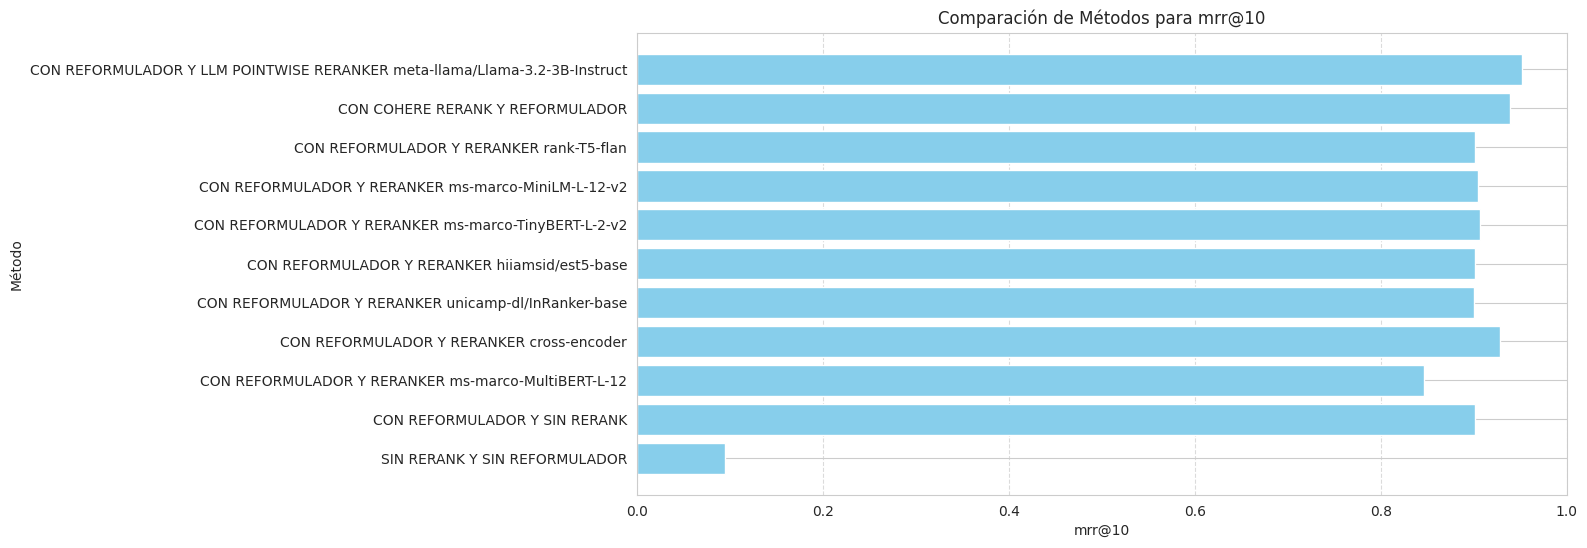

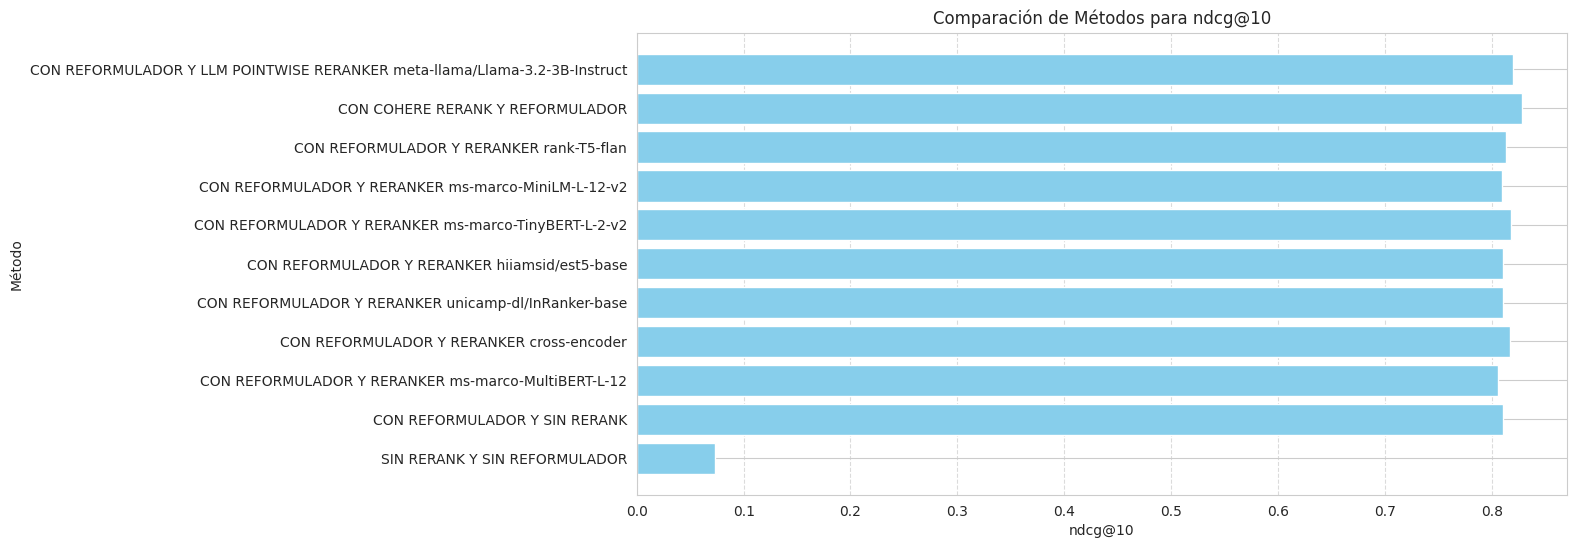

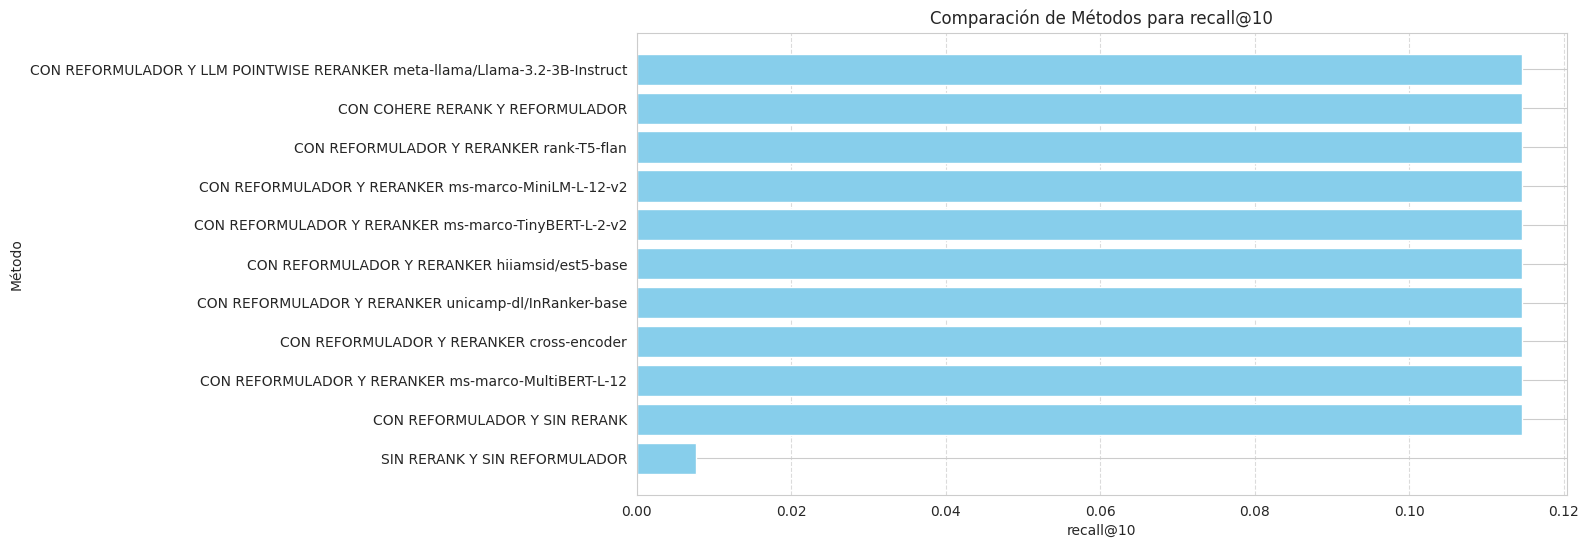

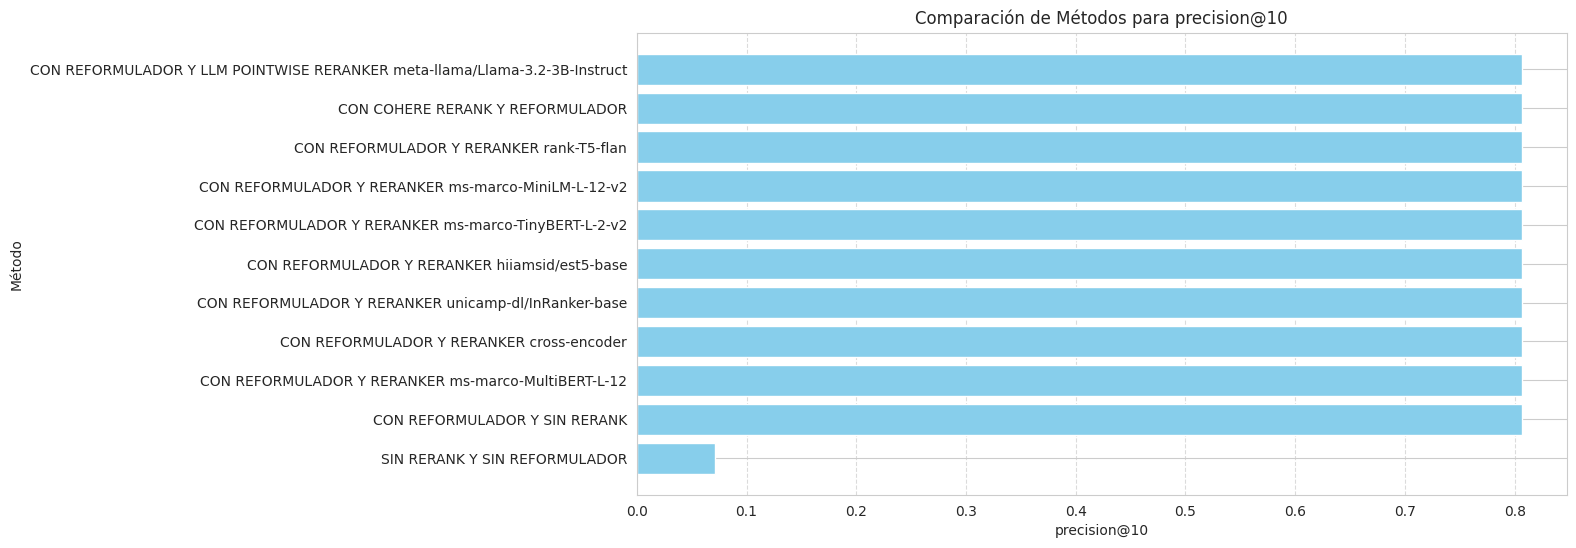

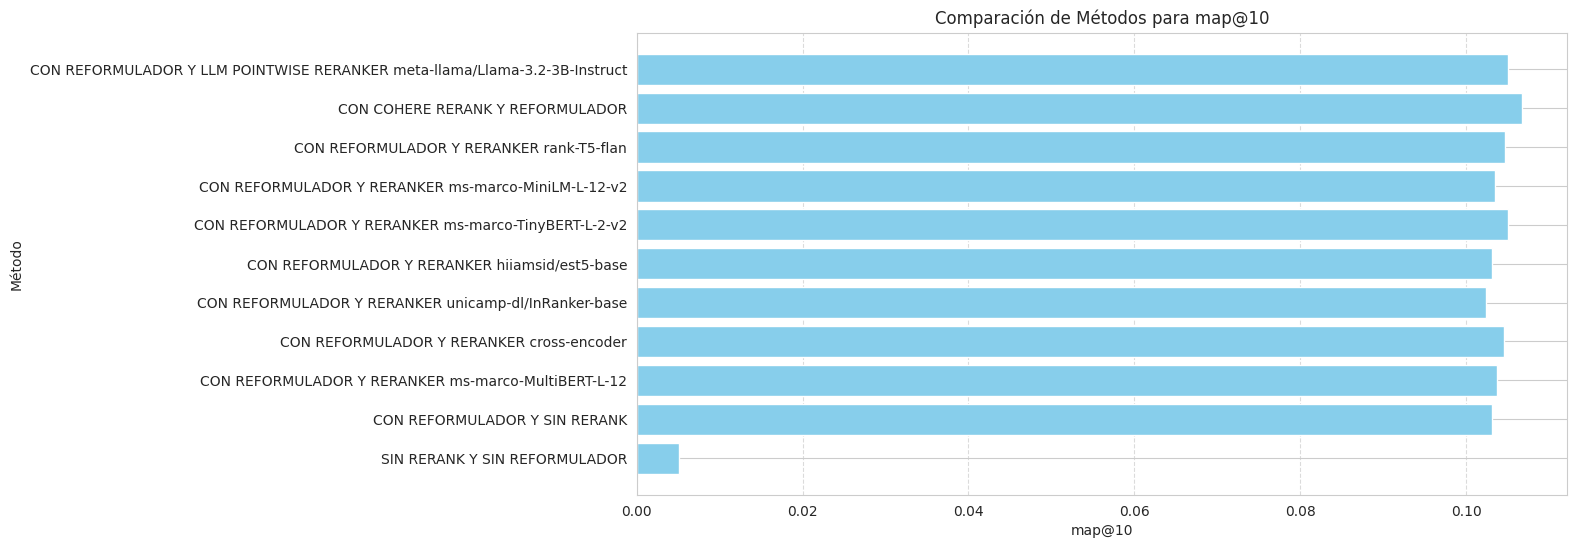

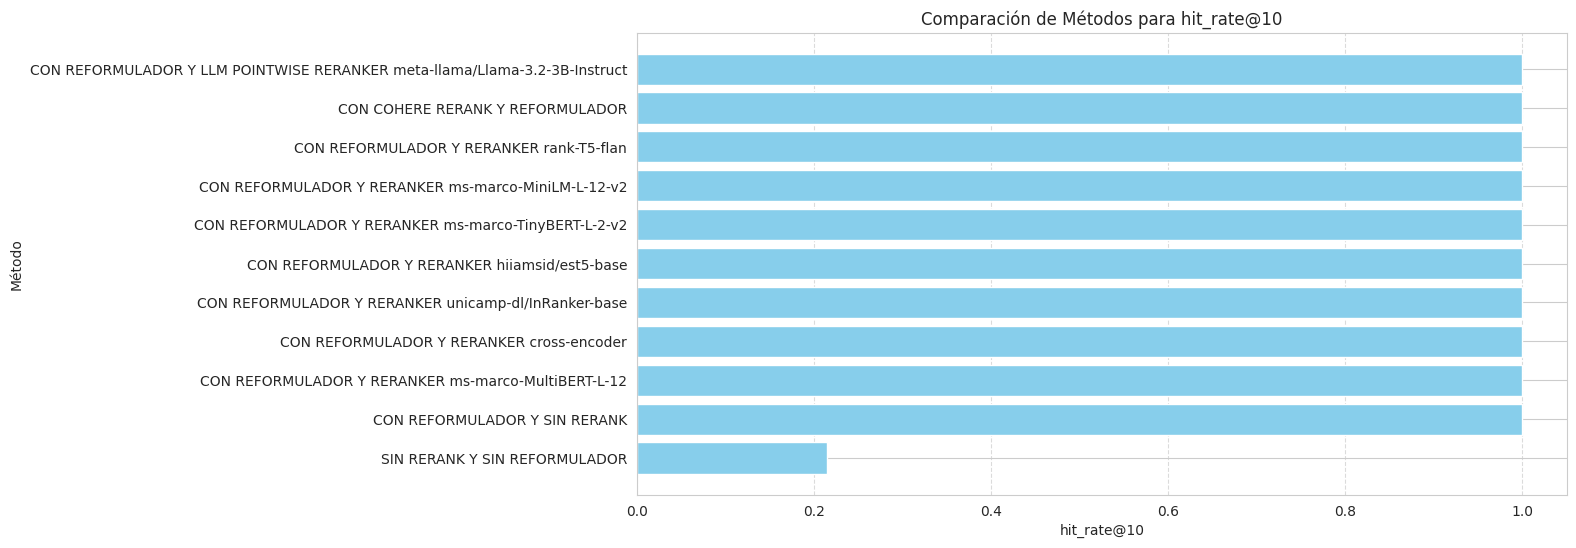

In [78]:
plot_metrics(all_results)